<a href="https://colab.research.google.com/github/naidu199/Machine_Learn/blob/main/ML_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#navie bayes classification

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df=pd.read_csv("/content/adult(NBC).csv",header=None, sep=',\s')


<ipython-input-96-a7aca7750d6e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv("/content/adult(NBC).csv",header=None, sep=',\s')


In [97]:
df=df[:100]
df.shape

(100, 15)

In [98]:
#column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns=col_names

In [99]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             100 non-null    int64 
 1   workclass       100 non-null    object
 2   fnlwgt          100 non-null    int64 
 3   education       100 non-null    object
 4   education_num   100 non-null    int64 
 5   marital_status  100 non-null    object
 6   occupation      100 non-null    object
 7   relationship    100 non-null    object
 8   race            100 non-null    object
 9   sex             100 non-null    object
 10  capital_gain    100 non-null    int64 
 11  capital_loss    100 non-null    int64 
 12  hours_per_week  100 non-null    int64 
 13  native_country  100 non-null    object
 14  income          100 non-null    object
dtypes: int64(6), object(9)
memory usage: 11.8+ KB


In [101]:
categorical_var=[i for i in df.columns if df[i].dtype=='O']
categorical_var

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [102]:
df[categorical_var].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [103]:
df[categorical_var].isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [104]:
for i in categorical_var:
  print(df[i].value_counts())

Private             70
Self-emp-not-inc     8
Federal-gov          6
Local-gov            6
State-gov            4
?                    4
Self-emp-inc         2
Name: workclass, dtype: int64
HS-grad         29
Some-college    20
Bachelors       17
11th             5
Masters          5
Assoc-acdm       5
Assoc-voc        5
9th              4
Doctorate        4
7th-8th          3
Prof-school      1
5th-6th          1
10th             1
Name: education, dtype: int64
Married-civ-spouse       55
Never-married            24
Divorced                 15
Separated                 3
Married-spouse-absent     2
Married-AF-spouse         1
Name: marital_status, dtype: int64
Prof-specialty       16
Exec-managerial      14
Sales                13
Other-service        10
Adm-clerical          9
Machine-op-inspct     9
Craft-repair          7
Tech-support          5
Handlers-cleaners     4
?                     4
Transport-moving      3
Farming-fishing       3
Protective-serv       3
Name: occupation,

In [105]:
#frequency distribution
for i in categorical_var:

    print(df[i].value_counts()/np.float(len(df)))

Private             0.70
Self-emp-not-inc    0.08
Federal-gov         0.06
Local-gov           0.06
State-gov           0.04
?                   0.04
Self-emp-inc        0.02
Name: workclass, dtype: float64
HS-grad         0.29
Some-college    0.20
Bachelors       0.17
11th            0.05
Masters         0.05
Assoc-acdm      0.05
Assoc-voc       0.05
9th             0.04
Doctorate       0.04
7th-8th         0.03
Prof-school     0.01
5th-6th         0.01
10th            0.01
Name: education, dtype: float64
Married-civ-spouse       0.55
Never-married            0.24
Divorced                 0.15
Separated                0.03
Married-spouse-absent    0.02
Married-AF-spouse        0.01
Name: marital_status, dtype: float64
Prof-specialty       0.16
Exec-managerial      0.14
Sales                0.13
Other-service        0.10
Adm-clerical         0.09
Machine-op-inspct    0.09
Craft-repair         0.07
Tech-support         0.05
Handlers-cleaners    0.04
?                    0.04
Transport-m

<ipython-input-105-7621d98e90d2>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[i].value_counts()/np.float(len(df)))
<ipython-input-105-7621d98e90d2>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[i].value_counts()/np.float(len(df)))
<ipython-input-105-7621d98e90d2>:4: DeprecationWarning: `np.float` is a deprecated a

In [106]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc'], dtype=object)

In [107]:
df.workclass.value_counts()

Private             70
Self-emp-not-inc     8
Federal-gov          6
Local-gov            6
State-gov            4
?                    4
Self-emp-inc         2
Name: workclass, dtype: int64

In [108]:
# replacing "?" values
df['workclass'].replace('?', np.NaN, inplace=True)

In [109]:
df.workclass.value_counts()

Private             70
Self-emp-not-inc     8
Federal-gov          6
Local-gov            6
State-gov            4
Self-emp-inc         2
Name: workclass, dtype: int64

In [110]:
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv'], dtype=object)

In [111]:
df.occupation.value_counts()

Prof-specialty       16
Exec-managerial      14
Sales                13
Other-service        10
Adm-clerical          9
Machine-op-inspct     9
Craft-repair          7
Tech-support          5
Handlers-cleaners     4
?                     4
Transport-moving      3
Farming-fishing       3
Protective-serv       3
Name: occupation, dtype: int64

In [112]:
df['occupation'].replace('?',np.NaN,inplace=True)

In [113]:
df.occupation.value_counts()

Prof-specialty       16
Exec-managerial      14
Sales                13
Other-service        10
Adm-clerical          9
Machine-op-inspct     9
Craft-repair          7
Tech-support          5
Handlers-cleaners     4
Transport-moving      3
Farming-fishing       3
Protective-serv       3
Name: occupation, dtype: int64

In [114]:
categorical_var

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [115]:
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England'], dtype=object)

In [116]:
df.native_country.value_counts()

United-States    83
?                 5
Mexico            3
Cuba              2
Puerto-Rico       2
Jamaica           1
India             1
South             1
Honduras          1
England           1
Name: native_country, dtype: int64

In [117]:
df['native_country'].replace('?',np.NaN,inplace=True)

In [118]:
df.native_country.value_counts()

United-States    83
Mexico            3
Cuba              2
Puerto-Rico       2
Jamaica           1
India             1
South             1
Honduras          1
England           1
Name: native_country, dtype: int64

In [119]:
#checking null values in categorical variables
df[categorical_var].isnull().sum()

workclass         4
education         0
marital_status    0
occupation        4
relationship      0
race              0
sex               0
native_country    5
income            0
dtype: int64

In [120]:
# checking for cardinality in categorical varibles
for i in categorical_var:
  print(i,len(df[i].unique()))

workclass 7
education 13
marital_status 6
occupation 13
relationship 6
race 5
sex 2
native_country 10
income 2


In [121]:
#numirical columns
numericals =[i for i in df.columns if df[i].dtype!='O']
numericals

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [122]:
df[numericals].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [123]:
df[numericals].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [124]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [125]:
#feature variables and target varibles
X=df.drop(['income'],axis=1)
Y=df['income']

In [126]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)


In [127]:
xtrain.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [128]:
categorical_var = [col for col in xtrain.columns if xtrain[col].dtypes == 'O']
numerical_var = [col for col in xtrain.columns if xtrain[col].dtypes != 'O']

In [129]:
xtrain[categorical_var].isnull().mean()

workclass         0.05
education         0.00
marital_status    0.00
occupation        0.05
relationship      0.00
race              0.00
sex               0.00
native_country    0.05
dtype: float64

In [130]:
for i in categorical_var:
  if xtrain[i].isnull().mean()>0:
    print(i, (xtrain[i].isnull().mean()))

workclass 0.05
occupation 0.05
native_country 0.05


In [131]:
for df2 in [xtrain, xtest]:
    df2['workclass'].fillna(xtrain['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(xtrain['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(xtrain['native_country'].mode()[0], inplace=True)

In [132]:
xtrain[categorical_var].isnull().mean()

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

In [133]:
xtest[categorical_var].isnull().mean()

workclass         0.0
education         0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native_country    0.0
dtype: float64

In [134]:
#!pip install category_encoders

In [135]:
#encoding categorical varibles
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

xtrain = encoder.fit_transform(xtrain)

xtest = encoder.transform(xtest)

In [136]:
cols=xtrain.columns


In [137]:
# feature scaling
from sklearn.preprocessing import RobustScaler
RS=RobustScaler()
xtrain1=RS.fit_transform(xtrain)
xtest1=RS.transform(xtest)

In [140]:
xtrain=pd.DataFrame(xtrain1,columns=[cols])
xtest=pd.DataFrame(xtest1,columns=[cols])

In [141]:
xtrain.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,fnlwgt,education_1,education_2,...,hours_per_week,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,native_country_6,native_country_7,native_country_8,native_country_9
0,0.527778,0.0,0.0,0.0,0.0,0.0,0.0,-0.651679,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.472222,0.0,0.0,0.0,0.0,0.0,0.0,-0.281550,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.290992,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.472222,0.0,0.0,0.0,0.0,0.0,0.0,0.797397,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.972222,-1.0,1.0,0.0,0.0,0.0,0.0,0.985288,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [146]:
ypred=gnb.predict(xtest)
ypred

array(['<=50K', '>50K', '<=50K', '>50K', '<=50K', '>50K', '<=50K',
       '<=50K', '>50K', '<=50K', '>50K', '<=50K', '<=50K', '<=50K',
       '>50K', '>50K', '<=50K', '>50K', '<=50K', '>50K'], dtype='<U5')

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.8

In [148]:
ypred_train=gnb.predict(xtrain)

In [149]:
ypred_train

array(['<=50K', '<=50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K',
       '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '>50K', '>50K',
       '<=50K', '>50K', '<=50K', '<=50K', '>50K', '<=50K', '>50K',
       '<=50K', '>50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K',
       '>50K', '>50K', '>50K', '<=50K', '>50K', '<=50K', '>50K', '<=50K',
       '>50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K',
       '<=50K', '<=50K', '<=50K', '<=50K', '>50K', '>50K', '>50K', '>50K',
       '>50K', '<=50K', '>50K', '<=50K', '<=50K', '>50K', '>50K', '>50K',
       '<=50K', '>50K', '<=50K', '<=50K', '<=50K', '<=50K', '>50K',
       '>50K', '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K',
       '>50K', '>50K', '>50K', '>50K', '>50K', '>50K', '<=50K'],
      dtype='<U5')

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrain,ypred_train)

0.7875

In [152]:
#checking the training and testing scores
gnb.score(xtrain,ytrain)

0.7875

In [153]:
gnb.score(xtest,ytest)

0.8

In [154]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)

<Axes: >

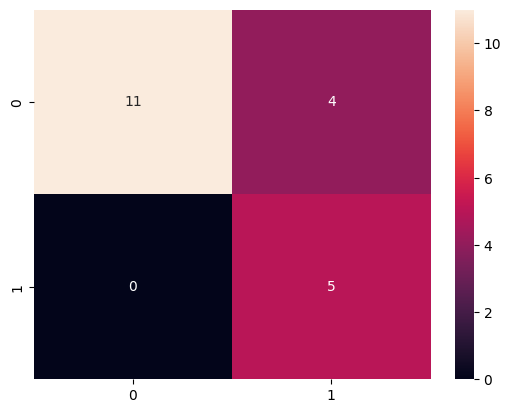

In [155]:
sns.heatmap(cm,annot=True)

In [157]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       <=50K       1.00      0.73      0.85        15
        >50K       0.56      1.00      0.71         5

    accuracy                           0.80        20
   macro avg       0.78      0.87      0.78        20
weighted avg       0.89      0.80      0.81        20

